<a href="https://colab.research.google.com/github/saireddyavs/applied-ai/blob/master/neural%20networks/lstm%20on%20imdb%20in%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers.embeddings import Embedding
top_words=1000

Using TensorFlow backend.


In [2]:
# got error when loading so gone for this: https://stackoverflow.com/questions/55890813/how-to-fix-object-arrays-cannot-be-loaded-when-allow-pickle-false-for-imdb-loa
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

#for this step got error did the above below steps from above link
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=top_words)


np.load = np_load_old

17465344/17464789 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(25000,)

In [4]:
y_train.shape

(25000,)

In [5]:
x_test.shape

(25000,)

In [6]:
y_test.shape

(25000,)

In [7]:
print(len(x_train[0]),len(x_train[1]),len(x_train[2]))

218 189 141


In [8]:
y_train[0]

1

In [0]:
# top_words not worked  do manually 
#took 1000 not got because indices[3,74] = 3078 is not in [0, 1000) eroor so taking 5000
x_train=x_train[:5000]
y_train=y_train[:5000]
x_test=x_test[:5000]
y_test=y_test[:5000]
top_words=5000



In [0]:
#padding
length=220 #taking small as i got max word length is 218 above they are actually aranged in sorted order in dataset
from keras.preprocessing import sequence
x_train=sequence.pad_sequences(x_train,maxlen=length)
x_test=sequence.pad_sequences(x_test,maxlen=length)



In [11]:

model = Sequential()
model.add(Embedding(top_words,32, input_length=length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 220, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
results=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 5000 samples, validate on 5000 samples
Epoch 1/5
5000/5000 [==============================] - 36s 7ms/step - loss: 0.6929 - acc: 0.5614 - val_loss: 0.6649 - val_acc: 0.6090
Epoch 2/5
5000/5000 [==============================] - 34s 7ms/step - loss: 0.6015 - acc: 0.7092 - val_loss: 0.4754 - val_acc: 0.7788
Epoch 3/5
5000/5000 [==============================] - 35s 7ms/step - loss: 0.4165 - acc: 0.8112 - val_loss: 0.4632 - val_acc: 0.7858
Epoch 4/5
5000/5000 [==============================] - 33s 7ms/step - loss: 0.3678 - acc: 0.8480 - val_loss: 0.4351 - val_acc: 0.8070
Epoch 5/5
5000/5000 [==============================] - 34s 7ms/step - loss: 0.3405 - acc: 0.8606 - val_loss: 0.4376 - val_acc: 0.8042


In [0]:
import matplotlib.pyplot as plt
def plt_dynamic(x, y, y_1, ax, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
    fig.canvas.draw()

5000/5000 [==============================] - 18s 4ms/step
Accuracy: 80.42%
(5000, 220) 5 5


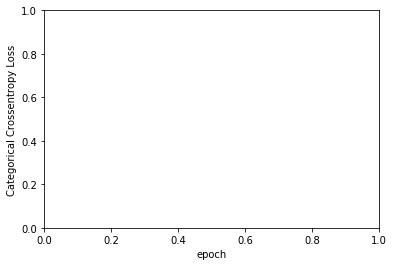

In [14]:

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,6+1))

vy = results.history['val_loss']
ty = results.history['loss']
print(x_test.shape,len(vy),len(ty))
#plt_dynamic(x, vy, ty, ax) #got error

In [15]:
#increasing accuarcy by trainng it more times
results=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64)

Train on 5000 samples, validate on 5000 samples
Epoch 1/20
5000/5000 [==============================] - 33s 7ms/step - loss: 0.3120 - acc: 0.8732 - val_loss: 0.4356 - val_acc: 0.8206
Epoch 2/20
5000/5000 [==============================] - 34s 7ms/step - loss: 0.3167 - acc: 0.8730 - val_loss: 0.4569 - val_acc: 0.8142
Epoch 3/20
5000/5000 [==============================] - 33s 7ms/step - loss: 0.3134 - acc: 0.8726 - val_loss: 0.4882 - val_acc: 0.7990
Epoch 4/20
5000/5000 [==============================] - 34s 7ms/step - loss: 0.2706 - acc: 0.8946 - val_loss: 0.4318 - val_acc: 0.8062
Epoch 5/20
5000/5000 [==============================] - 33s 7ms/step - loss: 0.2623 - acc: 0.8992 - val_loss: 0.4437 - val_acc: 0.8202
Epoch 6/20
5000/5000 [==============================] - 36s 7ms/step - loss: 0.2414 - acc: 0.9098 - val_loss: 0.4825 - val_acc: 0.8280
Epoch 7/20
5000/5000 [==============================] - 33s 7ms/step - loss: 0.2223 - acc: 0.9170 - val_loss: 0.4533 - val_acc: 0.8200
Epoch 8

In [16]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))



5000/5000 [==============================] - 19s 4ms/step
Accuracy: 80.80%


# using dropout

In [17]:
from keras.layers import Dropout
model1 = Sequential()
model1.add(Embedding(top_words,32, input_length=length))
model1.add(Dropout(0.2))
model1.add(LSTM(100))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 220, 32)           160000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 220, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
results=model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Train on 5000 samples, validate on 5000 samples
Epoch 1/5
5000/5000 [==============================] - 34s 7ms/step - loss: 0.6832 - acc: 0.5610 - val_loss: 0.6481 - val_acc: 0.6896
Epoch 2/5
5000/5000 [==============================] - 34s 7ms/step - loss: 0.5334 - acc: 0.7458 - val_loss: 0.4572 - val_acc: 0.7988
Epoch 3/5
5000/5000 [==============================] - 34s 7ms/step - loss: 0.3836 - acc: 0.8352 - val_loss: 0.4179 - val_acc: 0.8096
Epoch 4/5
5000/5000 [==============================] - 35s 7ms/step - loss: 0.3600 - acc: 0.8494 - val_loss: 0.4720 - val_acc: 0.7826
Epoch 5/5
5000/5000 [==============================] - 34s 7ms/step - loss: 0.3417 - acc: 0.8564 - val_loss: 0.4462 - val_acc: 0.8008


In [19]:
scores = model1.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))


5000/5000 [==============================] - 18s 4ms/step
Accuracy: 80.08%


#Keras provides this capability with parameters on the LSTM layer, the dropout for configuring the input dropout and recurrent_dropout for configuring the recurrent dropout

In [20]:
model2 = Sequential()
model2.add(Embedding(top_words, 32, input_length=length))
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 220, 32)           160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
results=model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Train on 5000 samples, validate on 5000 samples
Epoch 1/5
5000/5000 [==============================] - 41s 8ms/step - loss: 0.6820 - acc: 0.5896 - val_loss: 0.6640 - val_acc: 0.6594
Epoch 2/5
5000/5000 [==============================] - 39s 8ms/step - loss: 0.5965 - acc: 0.7136 - val_loss: 0.5759 - val_acc: 0.7066
Epoch 3/5
5000/5000 [==============================] - 39s 8ms/step - loss: 0.4725 - acc: 0.7882 - val_loss: 0.4723 - val_acc: 0.7734
Epoch 4/5
5000/5000 [==============================] - 40s 8ms/step - loss: 0.4268 - acc: 0.8126 - val_loss: 0.4835 - val_acc: 0.7648
Epoch 5/5
5000/5000 [==============================] - 40s 8ms/step - loss: 0.3936 - acc: 0.8338 - val_loss: 0.4776 - val_acc: 0.7756


In [22]:
scores = model2.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

5000/5000 [==============================] - 22s 4ms/step
Accuracy: 77.56%


# cnn after embedding

In [23]:
from keras.layers.convolutional import Conv1D,MaxPooling1D
model3 = Sequential()
model3.add(Embedding(top_words, 32, input_length=length))
model3.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(LSTM(100))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model3.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 220, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 220, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 110, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
results=model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Train on 5000 samples, validate on 5000 samples
Epoch 1/5
5000/5000 [==============================] - 24s 5ms/step - loss: 0.6770 - acc: 0.5536 - val_loss: 0.5828 - val_acc: 0.7028
Epoch 2/5
5000/5000 [==============================] - 18s 4ms/step - loss: 0.5259 - acc: 0.7510 - val_loss: 0.4169 - val_acc: 0.8242
Epoch 3/5
5000/5000 [==============================] - 18s 4ms/step - loss: 0.3434 - acc: 0.8478 - val_loss: 0.4343 - val_acc: 0.8210
Epoch 4/5
5000/5000 [==============================] - 18s 4ms/step - loss: 0.3034 - acc: 0.8794 - val_loss: 0.3804 - val_acc: 0.8298
Epoch 5/5
5000/5000 [==============================] - 18s 4ms/step - loss: 0.2712 - acc: 0.8884 - val_loss: 0.3834 - val_acc: 0.8296


In [25]:
scores = model3.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

5000/5000 [==============================] - 10s 2ms/step
Accuracy: 82.96%


In [26]:
results=model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64)

Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 18s 4ms/step - loss: 0.2475 - acc: 0.8990 - val_loss: 0.3820 - val_acc: 0.8342
Epoch 2/100
5000/5000 [==============================] - 18s 4ms/step - loss: 0.2177 - acc: 0.9174 - val_loss: 0.4202 - val_acc: 0.8366
Epoch 3/100
5000/5000 [==============================] - 18s 4ms/step - loss: 0.2058 - acc: 0.9204 - val_loss: 0.4637 - val_acc: 0.8310
Epoch 4/100
5000/5000 [==============================] - 18s 4ms/step - loss: 0.1998 - acc: 0.9244 - val_loss: 0.4273 - val_acc: 0.8328
Epoch 5/100
5000/5000 [==============================] - 18s 4ms/step - loss: 0.1651 - acc: 0.9388 - val_loss: 0.4418 - val_acc: 0.8228
Epoch 6/100
5000/5000 [==============================] - 18s 4ms/step - loss: 0.1536 - acc: 0.9464 - val_loss: 0.4923 - val_acc: 0.8284
Epoch 7/100
5000/5000 [==============================] - 18s 4ms/step - loss: 0.1301 - acc: 0.9572 - val_loss: 0.5040 - val_acc: 0.8298
